In [1]:
import pandas as pd
from  matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
plt.style.use('ggplot')
color=sns.color_palette('rocket')
#spliting strings by column for easy analysis
def count_string(df,col,split_by):
    strings_list=df[col].str.split(split_by).dropna()
    linear_list=[x for sublist in strings_list for x in sublist]
    return pd.Series(linear_list)

#About the dataset :


https://survey.stackoverflow.co/2023/

Find previous survey results here:

https://insights.stackoverflow.com/survey

Legal:
This database - The Public 2023 Stack Overflow Developer Survey Results - is made available under the Open Database License (ODbL): http://opendatacommons.org/licenses/odbl/1.0/. Any rights in individual contents of the database are licensed under the Database Contents License: http://opendatacommons.org/licenses/dbcl/1.0/

TLDR: You are free to share, adapt, and create derivative works from The Public 2023 Stack Overflow Developer Survey Results as long as you attribute Stack Overflow, keep the database open (if you redistribute it), and continue to share-alike any adapted database under the ODbl.
Acknowledgment:
3


In [3]:
df=pd.read_csv('D:\python\data_sets\coders_insights\survey_results_public_23.csv')

In [4]:
df_country=df[df['Country']=='India']

In [5]:
df_country.reset_index(inplace=True)

In [6]:
df.head(3)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0


In [7]:
#eduction level of the programes taken this survey_2023 across the world

Text(0.5, 1.0, 'Education_level of the programmers from the india according to the survey_2023')

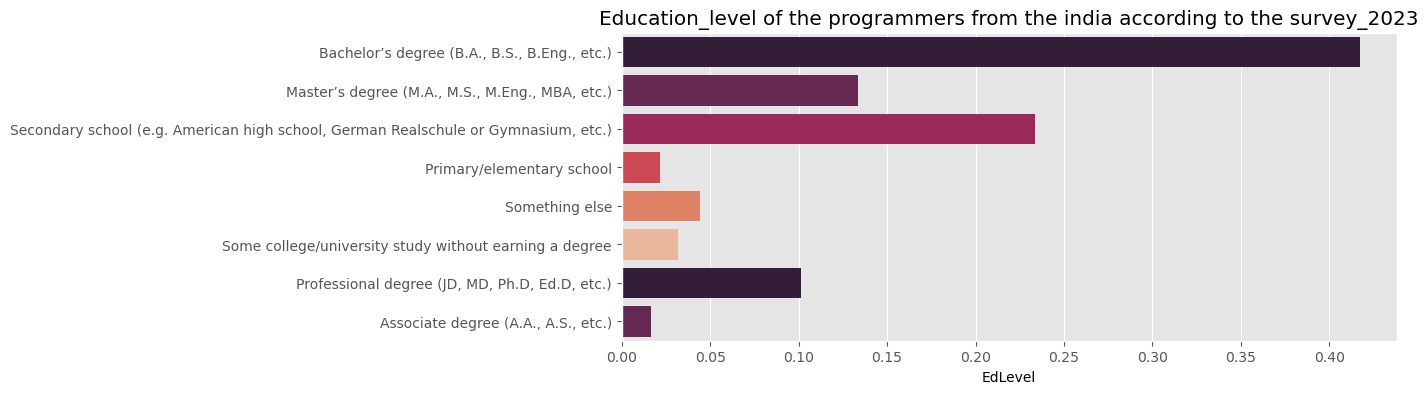

In [8]:
plt.figure(figsize=[10,4])
sns.barplot(x=df['EdLevel'].value_counts(normalize=True,sort=False),y=df_country['EdLevel'].unique(),palette=color)
plt.title("Education_level of the programmers from the india according to the survey_2023")

In [9]:
#Age distrubtion of the coders who have taken this stack_overflow_survey_2023

Text(0.5, 1.0, 'Age distribution of the programers across the world')

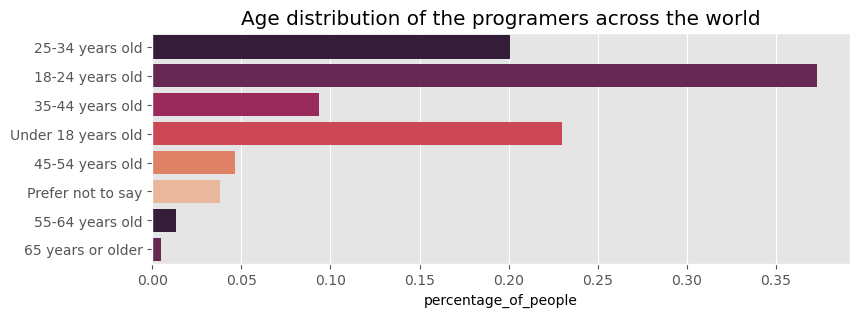

In [10]:
plt.figure(figsize=[9,3])
sns.barplot(x=df['Age'].value_counts(sort=False,normalize=True),y=df_country['Age'].unique(),palette=color)
plt.xlabel('percentage_of_people')
plt.title('Age distribution of the programers across the world')

In [11]:
# Analysing popular framework used by the programmers across the world for the web_developent 

Text(0.5, 1.0, 'Web_frameworke used by proggramers world wide')

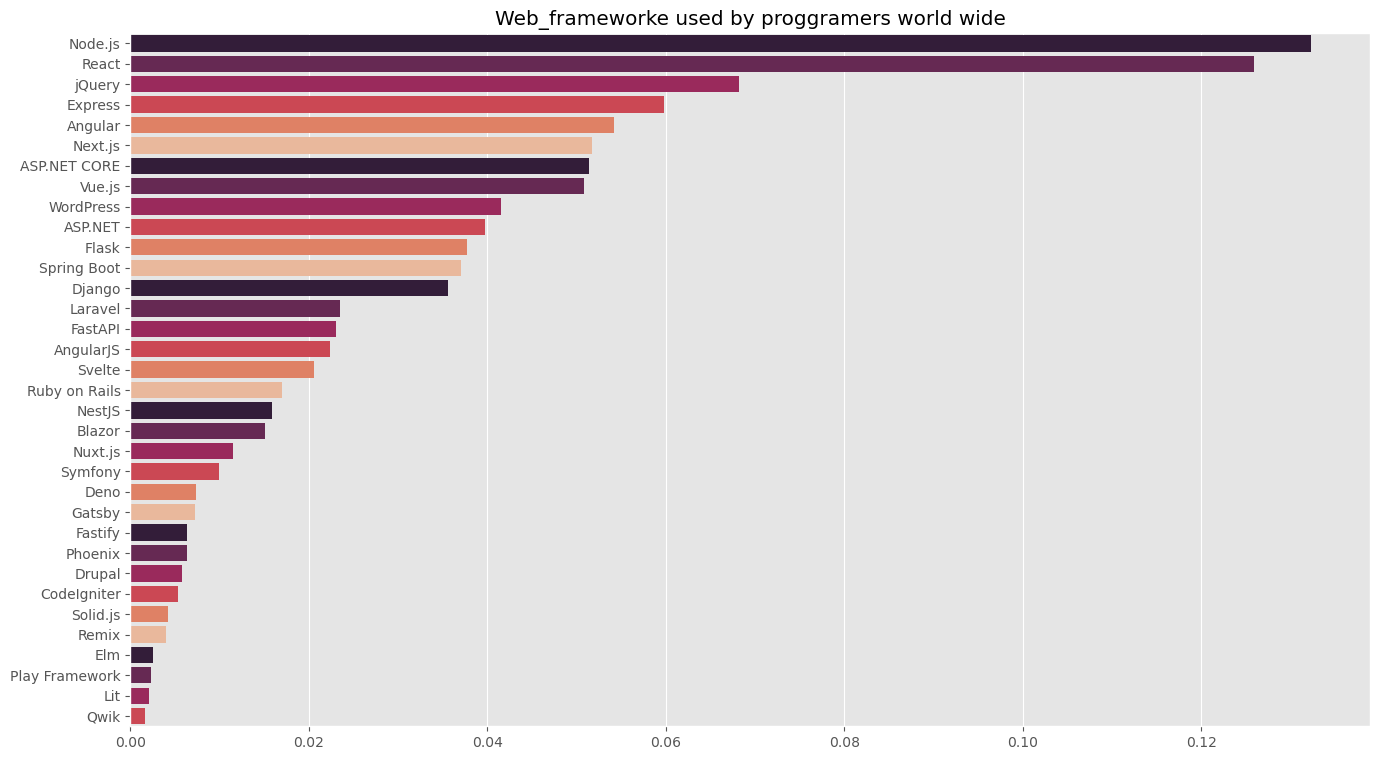

In [12]:
fw_worked=df['WebframeHaveWorkedWith'].str.split(';').dropna()
#unpacing list with in the list in to the single list
fw_worked_flatten=[fw for sublist in fw_worked for fw in sublist ]
fw=pd.Series(fw_worked_flatten).value_counts(normalize=True)
plt.figure(figsize=[16,9])
sns.barplot(x=fw,y=fw.index,palette=color)
plt.title('Web_frameworke used by proggramers world wide')

In [13]:
# Analysing popular technologies used by the programmers across the world for the databases

Text(0.5, 1.0, 'Database used by programers across the world')

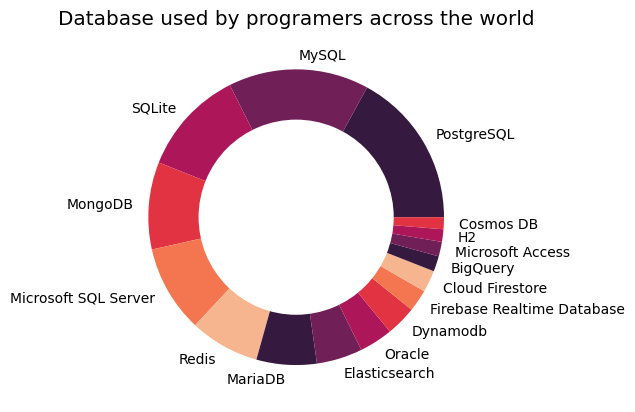

In [14]:
Databaseworked=df['DatabaseHaveWorkedWith'].str.split(';').dropna()
Database=[database for sublist in Databaseworked for database in sublist]
Databases=pd.Series(Database).value_counts(normalize=True)#0.01
plt.pie(x=Databases[Databases>=0.01],labels=Databases[Databases>=0.01].index,colors=color)
plt.pie([1],radius=0.66,colors='w')
plt.title('Database used by programers across the world')

In [ ]:
#languages popularity

Text(0.5, 1.0, ' language used by proggramers world wide')

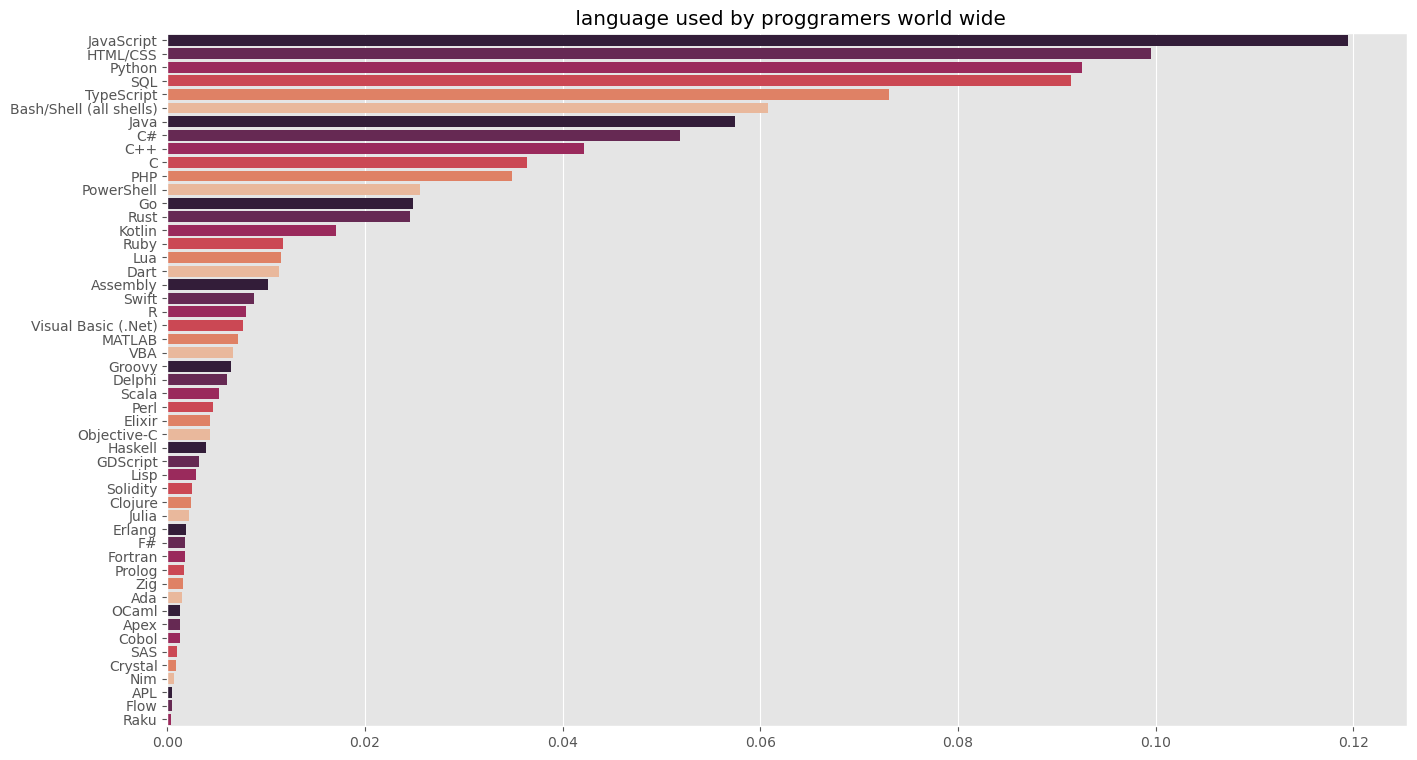

In [15]:
df_language=count_string(df,'LanguageHaveWorkedWith',';')
plt.figure(figsize=[16,9])
sns.barplot(x=df_language.value_counts(normalize=True),y=df_language.value_counts().index,palette=color)
plt.title(' language used by proggramers world wide')

Text(0.5, 1.0, 'PROFESSION BY PROGTAMMERS')

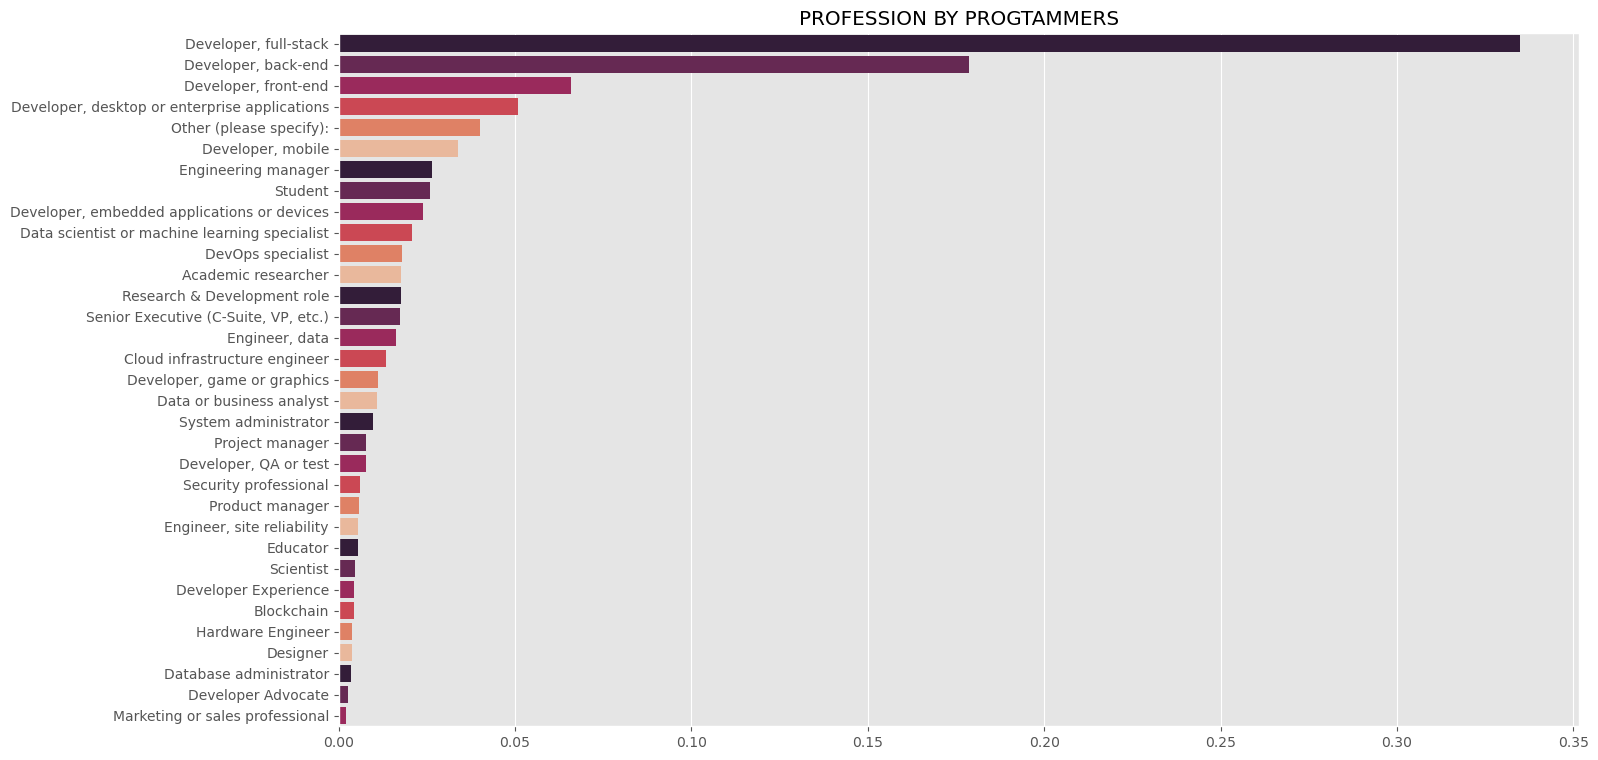

In [16]:
df_profession=count_string(df,'DevType',';')
plt.figure(figsize=[16,9])
sns.barplot(x=df_profession.value_counts(normalize=True),y=df_profession.value_counts().index,palette=color)
plt.title('PROFESSION BY PROGTAMMERS')

In [ ]:
#online platforms used for learning code

Text(0.5, 1.0, ' language used by proggramers world wide')

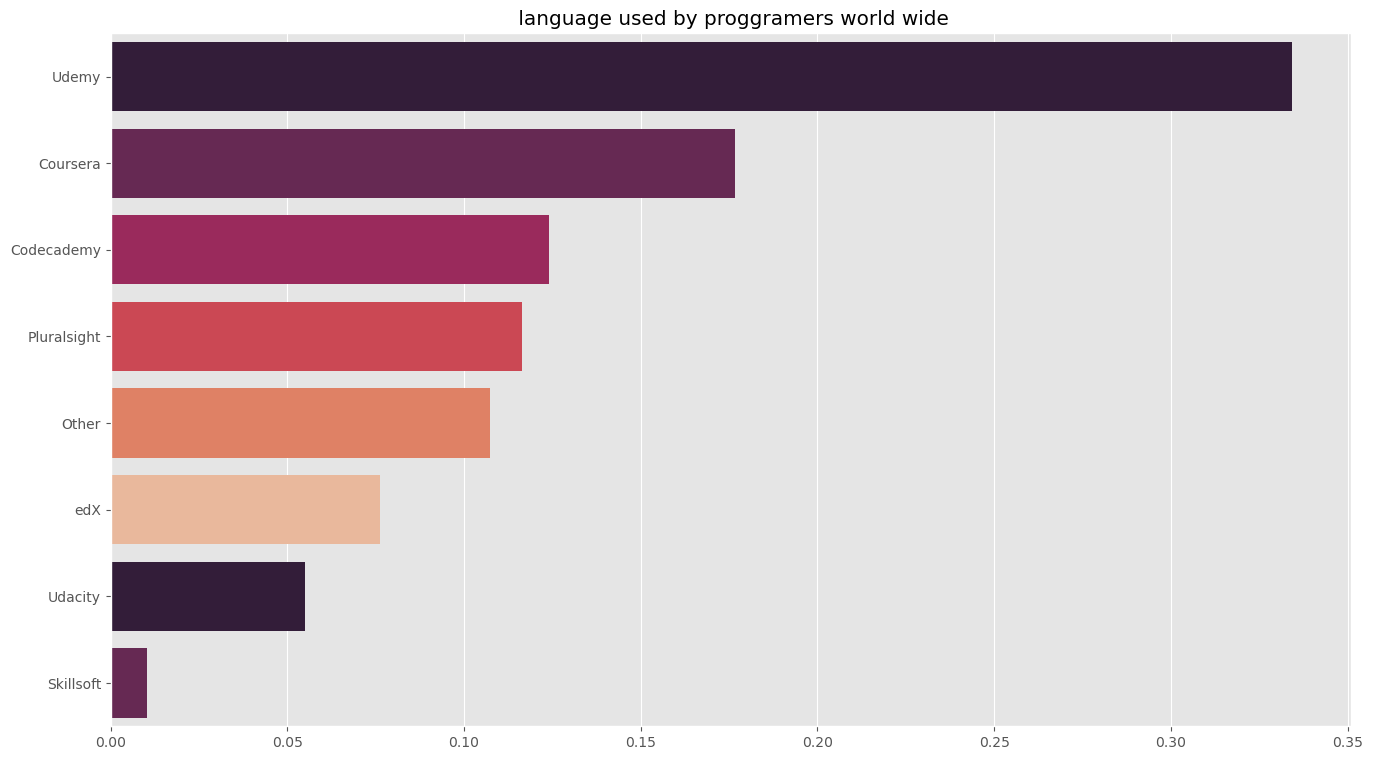

In [18]:
learned_online=count_string(df,'LearnCodeCoursesCert',';')
plt.figure(figsize=[16,9])

sns.barplot(x=learned_online.value_counts(normalize=True),y=learned_online.value_counts().index,palette=color)
plt.title(' language used by proggramers world wide')

Text(0.5, 1.0, 'popular_tools_used_by_programmers')

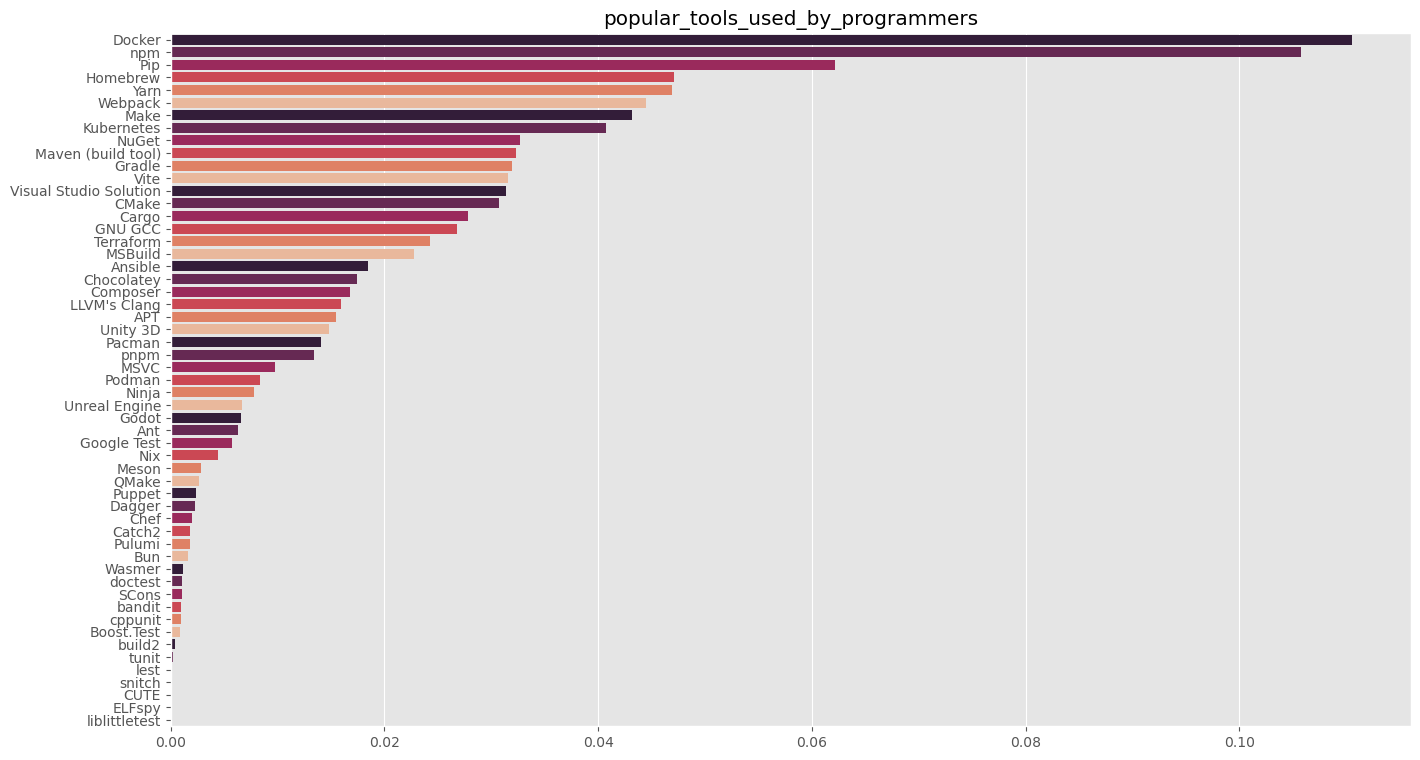

In [19]:
tools_used=count_string(df,'ToolsTechHaveWorkedWith',';')
plt.figure(figsize=[16,9])
sns.barplot(x=tools_used.value_counts(normalize=True),y=tools_used.value_counts().index,palette=color)
plt.title('popular_tools_used_by_programmers')

In [ ]:
#IMPACT OF AI ON PROGRAMMERS

In [20]:
#function for plotting the bar plots columns contains strings
def count_strings_plot(df,col,split_by,name):
    strings_list=df[col].str.split(split_by).dropna()
    linear_list=[x for sublist in strings_list for x in sublist]
    frame=pd.Series(linear_list)
    sns.barplot(x=frame.value_counts(normalize=True),y=frame.value_counts().index,palette=color)
    plt.title(name)
    return plt.show()

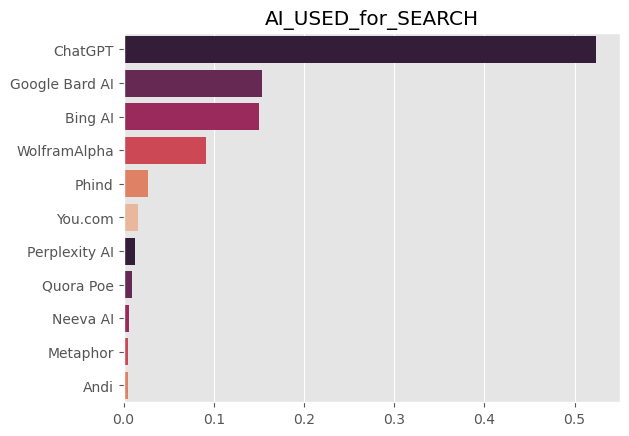

In [21]:
count_strings_plot(df,'AISearchWantToWorkWith',';','AI_USED_for_SEARCH')

In [22]:
#function for plotting the bar plots columns contains strings
def count_strings_pieplot(df,col,split_by,name):
    strings_list=df[col].str.split(split_by).dropna()
    linear_list=[x for sublist in strings_list for x in sublist]
    frame=pd.Series(linear_list)
    plt.pie(x=frame.value_counts(normalize=True),labels=frame.value_counts().index,colors=color)
    plt.title(name)
    return plt.show()


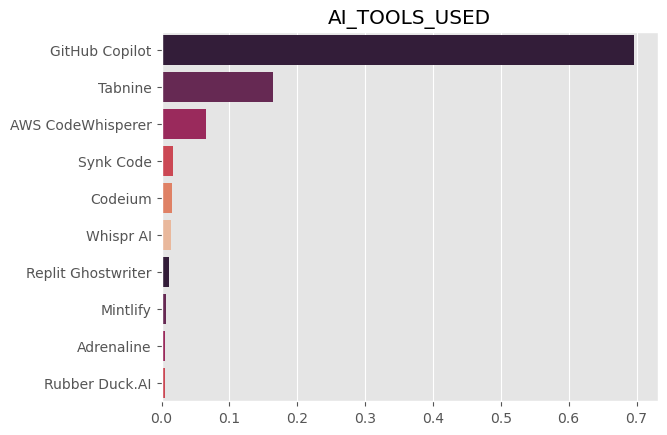

In [23]:
count_strings_plot(df,'AIDevHaveWorkedWith',';','AI_TOOLS_USED')

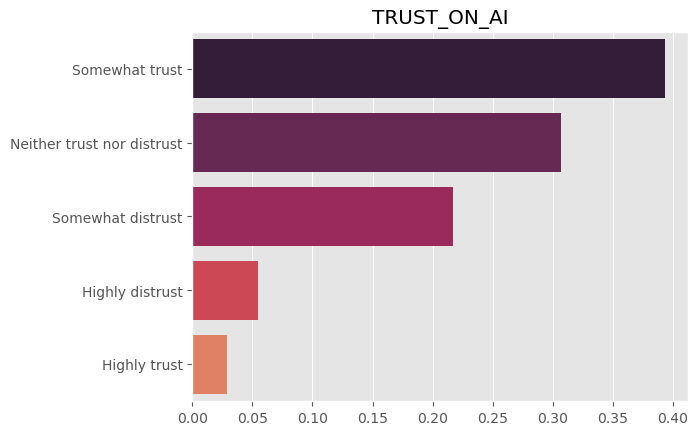

In [24]:
count_strings_plot(df,'AIBen',';','TRUST_ON_AI')

In [ ]:
#INDUSTRY WORKING IN AS A PROGRAMMER

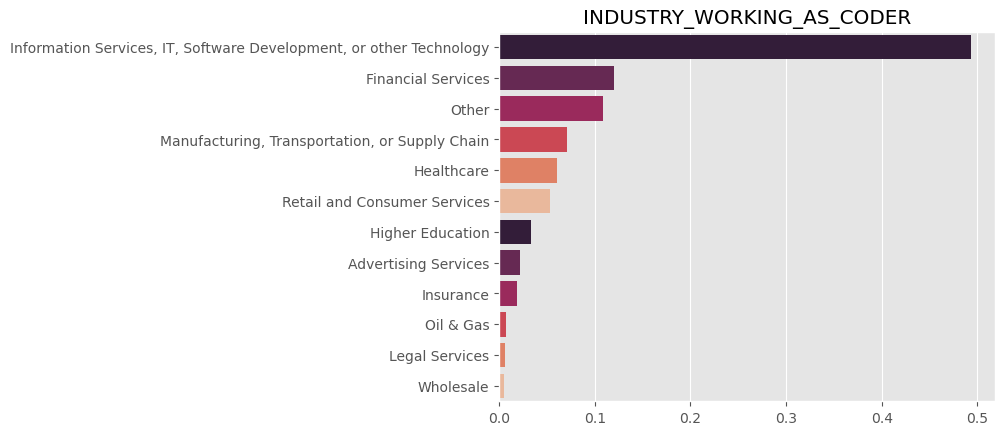

In [25]:
count_strings_plot(df,'Industry',';','INDUSTRY_WORKING_AS_CODER')